In [221]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import seaborn as sns

from matplotlib.colors import TwoSlopeNorm

import os.path as op
from mne.time_frequency import tfr_multitaper
from mne.stats import permutation_cluster_1samp_test as pcluster_test

from mne_connectivity import spectral_connectivity_epochs, seed_target_indices
from mne.datasets import sample
from mne_connectivity.viz import plot_sensors_connectivity
from mne.stats import permutation_cluster_test
from scipy import stats as stats
from functools import partial

print(__doc__)

Average Baseline


In [222]:
dict015= {'FP1':'eeg','FP2':'eeg','AF7':'eeg','AF3':'eeg','AFz':'eeg','AF4':'eeg','AF8':'eeg','F7':'eeg','F3':'eeg',
          'Fz':'eeg','F4':'eeg','F8':'eeg','FT9':'eeg','FC5':'eeg','FC1':'eeg','FC2':'eeg','FC6':'eeg','FT10':'eeg',
          'T7':'eeg','C3':'eeg','Cz':'eeg','C4':'eeg','T8':'eeg','TP9':'eeg','CP5':'eeg','CP1':'eeg', 'CP2':'eeg',
          'CP6':'eeg','TP10':'eeg','P7':'eeg','P3':'eeg','Pz':'eeg','P4':'eeg','P8':'eeg', 'O1':'eeg','O2':'eeg',
          'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
          'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'misc',
          'DynL(lc)':'misc','DynR(lc)':'misc','EmgL':'emg','EmgR':'emg','EmgL(lc)':'emg','EmgR(lc)':'emg'}

dict013_imp = {'FP1':'eeg','FP2':'eeg','AF7':'eeg','AF3':'eeg','AFz':'eeg','AF4':'eeg','AF8':'eeg','F7':'eeg','F3':'eeg',
          'Fz':'eeg','F4':'eeg','F8':'eeg','FC5':'eeg','FC1':'eeg','FC2':'eeg','FC6':'eeg',
          'T7':'eeg','C3':'eeg','Cz':'eeg','C4':'eeg','T8':'eeg','FT9':'eeg','CP5':'eeg','CP1':'eeg', 'CP2':'eeg',
          'CP6':'eeg','FT10':'eeg','TP9':'eeg','P3':'eeg','Pz':'eeg','P4':'eeg','P8':'eeg', 'O1':'eeg','O2':'eeg',
          'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
          'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'misc',
          'DynL(lc)':'misc','DynR(lc)':'misc','EmgL':'emg','EmgR':'emg','EmgL(lc)':'emg','EmgR(lc)':'emg'}

dict013_exp = dict015

dict011_imp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg','F4':'eeg','Fz':'eeg','F3':'eeg',
              'F7':'eeg','FC6':'eeg','FC2':'eeg','FC1':'eeg','FC5':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg','T7':'eeg','FT10':'eeg',
               'CP6':'eeg','CP2':'eeg','CP1':'eeg', 'CP5':'eeg', 'FT9':'eeg', 'TP10':'eeg','P4':'eeg','Pz':'eeg','P3':'eeg','P7':'eeg','O2':'eeg',
               'O1':'eeg', 'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs','DBS6-7':'dbs','DBS7-8':'dbs',
              'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'misc',
             'DynR(lc)':'misc', 'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict011_exp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg','F4':'eeg','Fz':'eeg','F3':'eeg',
              'F7':'eeg','FT10':'eeg', 'FC6':'eeg','FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
               'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg', 'CP5':'eeg', 'TP9':'eeg', 'P8':'eeg','P4':'eeg','Pz':'eeg',
               'P3':'eeg','P7':'eeg','O2':'eeg', 'O1':'eeg', 'DBS1-2':'dbs','DBS2-3':'dbs','DBS3-4':'dbs','DBS4-5':'dbs','DBS5-6':'dbs',
               'DBS6-7':'dbs','DBS7-8':'dbs', 'mean(DBS1-DBS2, DBS2-DBS3, DBS3-DBS4, DBS4-DBS5, DBS5-DBS6, DBS6-DBS7, DBS7-DBS8)':'misc',
             'DynR(lc)':'misc', 'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}
           
    
#'DBS1-234':'dbs','DBS234-567':'dbs','DBS567-8':'dbs','mean(DBS1-234, DBS234-567, DBS567-8)':'dbs',

dict08_imp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FT10':'eeg','FC6':'eeg',
                'FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
                'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg','CP5':'eeg','TP9':'eeg','P4':'eeg',
                'Pz':'eeg','P3':'eeg','O2':'eeg','O1':'eeg',
                  'DBS1-2':'dbs', 'DBS1-3':'dbs', 'DBS1-4':'dbs','DBS2-5':'dbs', 'DBS3-6':'dbs', 
                  'DBS4-7':'dbs', 'DBS5-8':'dbs', 'DBS6-8':'dbs', 'DBS7-8':'dbs',              
                'mean(DBS1-2, DBS1-3, DBS1-4, DBS2-5, DBS3-6, DBS4-7, DBS5-8, DBS6-8, DBS7-8)':'misc',             
              'DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict08_exp = {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FC6':'eeg', 'FC2':'eeg','FC1':'eeg','FC5':'eeg',
              'T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg', 'T7':'eeg','FT10':'eeg', 'CP6':'eeg','CP2':'eeg',
              'CP1':'eeg','CP5':'eeg','FT9':'eeg','TP10':'eeg', 'P4':'eeg','Pz':'eeg','P3':'eeg','P7':'eeg',
              'O2':'eeg','O1':'eeg',
                  'DBS1-2':'dbs', 'DBS1-3':'dbs', 'DBS1-4':'dbs','DBS2-5':'dbs', 'DBS3-6':'dbs', 
                  'DBS4-7':'dbs', 'DBS5-8':'dbs', 'DBS6-8':'dbs', 'DBS7-8':'dbs',              
                'mean(DBS1-2, DBS1-3, DBS1-4, DBS2-5, DBS3-6, DBS4-7, DBS5-8, DBS6-8, DBS7-8)':'misc',         
              'DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict07_imp= {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FT10':'eeg','FC6':'eeg',
                'FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
                'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg','CP5':'eeg','TP9':'eeg','P4':'eeg',
                'Pz':'eeg','P3':'eeg','O2':'eeg','O1':'eeg',
                  'DBS1-2':'dbs', 'DBS1-3':'dbs', 'DBS1-4':'dbs','DBS2-5':'dbs', 'DBS3-6':'dbs', 
                  'DBS4-7':'dbs', 'DBS5-8':'dbs', 'DBS6-8':'dbs', 'DBS7-8':'dbs',              
                'mean(DBS1-2, DBS1-3, DBS1-4, DBS2-5, DBS3-6, DBS4-7, DBS5-8, DBS6-8, DBS7-8)':'misc',
             'DynR':'misc','DynL':'misc','DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict07_exp= {'FP1':'eeg','FP2':'eeg','AF8':'eeg','AF4':'eeg','AFz':'eeg','AF3':'eeg','AF7':'eeg','F8':'eeg',
                'F4':'eeg','Fz':'eeg','F3':'eeg','F7':'eeg','FT10':'eeg','FC6':'eeg',
                'FC2':'eeg','FC1':'eeg','FC5':'eeg','FT9':'eeg','T8':'eeg','C4':'eeg','Cz':'eeg','C3':'eeg',
                'T7':'eeg','TP10':'eeg','CP6':'eeg','CP2':'eeg','CP1':'eeg','CP5':'eeg','TP9':'eeg','P8':'eeg','P4':'eeg',
                'Pz':'eeg','P3':'eeg','P7':'eeg','O2':'eeg','O1':'eeg',
                  'DBS1-2':'dbs', 'DBS1-3':'dbs', 'DBS1-4':'dbs','DBS2-5':'dbs', 'DBS3-6':'dbs', 
                  'DBS4-7':'dbs', 'DBS5-8':'dbs', 'DBS6-8':'dbs', 'DBS7-8':'dbs',              
                'mean(DBS1-2, DBS1-3, DBS1-4, DBS2-5, DBS3-6, DBS4-7, DBS5-8, DBS6-8, DBS7-8)':'misc',         
             'DynR(lc)':'misc',
                'DynL(lc)':'misc','EmgR':'emg','EmgL':'emg','EmgR(lc)':'emg','EmgL(lc)':'emg'}

dict_eog= {'FP1':'eog'}

In [223]:
base_dir = "E:/Oddball Data/"
subj_list = ['007','008','011','013','014','015']
subj_list = ['015']

stage = ['implant']#, 'implant']explant
aff_cond = ['1', '101'];
aff_cond_plot = ['Standard', 'Oddball'];

naff_cond = ['10', '110'];

for sub in subj_list:
    for st in stage:
        data_dir = base_dir+"EDEN"+sub+'/ANALYSIS/'
        fname = data_dir+"data_clean"+st+'.mat'
                
        if sub == '015' or sub=='014':
            dict1 = dict015
        elif sub == '013' and st== 'implant':
            dict1 = dict013_imp
        elif sub == '013' and st== 'explant':
            dict1 = dict013_exp
        elif sub == '011' and st== 'implant':
            dict1 = dict011_imp
        elif sub == '011' and st== 'explant':
            dict1 = dict011_exp
        elif sub == '008' and st== 'implant':
            dict1 = dict08_imp
        elif sub == '008' and st== 'explant':
            dict1 = dict08_exp
        elif sub == '007' and st== 'implant':
            dict1 = dict07_imp
        elif sub == '007' and st== 'explant':
            dict1 = dict07_exp

        info = mne.create_info(list(dict1.keys()), sfreq=200, ch_types='misc', verbose=None)
        epochs = mne.read_epochs_fieldtrip(fname,info,data_name='x', trialinfo_column=0)
        
        sfreq = epochs.info['sfreq']
        
        epochs.set_channel_types(dict1)
        
        epochs = epochs.copy().set_eeg_reference(ref_channels="average")


        kind='easycap-M1'
        mon = mne.channels.make_standard_montage(kind, head_size='auto')
        epochs.set_montage(mon,match_case=False, on_missing='ignore')
        
        epochs = epochs.filter(0.05,20, method='iir')

        epochs_aff_odd = epochs[aff_cond[1]]
        epochs_aff_typ = epochs[aff_cond[0]]

        mne.epochs.equalize_epoch_counts([epochs_aff_typ,epochs_aff_odd], method='mintime')
        
        epochs_aff_odd.set_channel_types(dict_eog)
        epochs_aff_typ.set_channel_types(dict_eog)
        
epochs_aff_odd = epochs_aff_odd.apply_baseline((-0.5,0))
epochs_aff_typ = epochs_aff_typ.apply_baseline((-0.5,0))

Adding metadata with 9 columns
445 matching events found
No baseline correction applied


C:\Users\malann\AppData\Local\Temp\ipykernel_481664\1721521384.py:40: RuntimeWarning: The unit for channel(s) AF3, AF4, AF7, AF8, AFz, C3, C4, CP1, CP2, CP5, CP6, Cz, DBS1-2, DBS2-3, DBS3-4, DBS4-5, DBS5-6, DBS6-7, DBS7-8, EmgL, EmgL(lc), EmgR, EmgR(lc), F3, F4, F7, F8, FC1, FC2, FC5, FC6, FP1, FP2, FT10, FT9, Fz, O1, O2, P3, P4, P7, P8, Pz, T7, T8, TP10, TP9 has changed from NA to V.
  epochs.set_channel_types(dict1)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting up band-pass filter from 0.05 - 20 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.05, 20.00 Hz: -6.02, -6.02 dB

Dropped 92 epochs: 0, 3, 6, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 31, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 50, 51, 52, 53, 55, 56, 57, 59, 61, 62, 65, 66, 67, 68, 73, 74, 75, 76, 78, 79, 80, 82, 84, 85, 90, 91, 92, 93, 94, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 117, 118, 120, 122, 127, 128, 129, 130, 131, 135, 137, 138, 139, 140, 141, 143
Dropped 0 epochs: 
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


In [174]:
'''

"""Average Baseline"""
epochs_aff_odd_norm1 =[] 
for ii,ch in enumerate(epochs_aff_odd.ch_names):
    x = np.hstack(epochs_aff_odd.get_data()[:, ii, :]) # 2D dim = epoch* ch* time to 1D dim, freq * (time *epoch)

    x_mean=x.mean() # mean of all the freqs across all the complete experiment session.
    epochs_aff_odd_norm=[]    
    for jj in range(epochs_aff_odd.get_data()[:, ii, :].shape[0]):
        epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
    epochs_aff_odd_norm1.append(epochs_aff_odd_norm)
epochs_aff_odd_norm1 = np.array(epochs_aff_odd_norm1)
epochs_aff_odd_norm1 = np.rollaxis(epochs_aff_odd_norm1,1) # normalized epoch data

epochs_aff_odd = mne.EpochsArray(epochs_aff_odd_norm1,  epochs_aff_odd.info, events=epochs_aff_odd.events, tmin=epochs_aff_odd.tmin)


"""Average Baseline"""
epochs_aff_typ_norm1 =[] 
for ii,ch in enumerate(epochs_aff_typ.ch_names):
    x = np.hstack(epochs_aff_typ.get_data()[:, ii, :]) # 2D dim = epoch* ch* time to 1D dim, freq * (time *epoch)

    x_mean=x.mean() # mean of all the freqs across all the complete experiment session.
    epochs_aff_typ_norm=[]    
    for jj in range(epochs_aff_typ.get_data()[:, ii, :].shape[0]):
        epochs_aff_typ_norm.append(((epochs_aff_typ.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail
    epochs_aff_typ_norm1.append(epochs_aff_typ_norm)
epochs_aff_typ_norm1 = np.array(epochs_aff_typ_norm1)
epochs_aff_typ_norm1 = np.rollaxis(epochs_aff_typ_norm1,1) # normalized epoch data

epochs_aff_typ = mne.EpochsArray(epochs_aff_typ_norm1,  epochs_aff_typ.info, events=epochs_aff_typ.events, tmin=epochs_aff_typ.tmin)

'''


'\n\n"""Average Baseline"""\nepochs_aff_odd_norm1 =[] \nfor ii,ch in enumerate(epochs_aff_odd.ch_names):\n    x = np.hstack(epochs_aff_odd.get_data()[:, ii, :]) # 2D dim = epoch* ch* time to 1D dim, freq * (time *epoch)\n\n    x_mean=x.mean() # mean of all the freqs across all the complete experiment session.\n    epochs_aff_odd_norm=[]    \n    for jj in range(epochs_aff_odd.get_data()[:, ii, :].shape[0]):\n        epochs_aff_odd_norm.append(((epochs_aff_odd.get_data()[jj, ii, :]-x_mean))) # applying normalaization on each trail\n    epochs_aff_odd_norm1.append(epochs_aff_odd_norm)\nepochs_aff_odd_norm1 = np.array(epochs_aff_odd_norm1)\nepochs_aff_odd_norm1 = np.rollaxis(epochs_aff_odd_norm1,1) # normalized epoch data\n\nepochs_aff_odd = mne.EpochsArray(epochs_aff_odd_norm1,  epochs_aff_odd.info, events=epochs_aff_odd.events, tmin=epochs_aff_odd.tmin)\n\n\n"""Average Baseline"""\nepochs_aff_typ_norm1 =[] \nfor ii,ch in enumerate(epochs_aff_typ.ch_names):\n    x = np.hstack(epochs_aff_

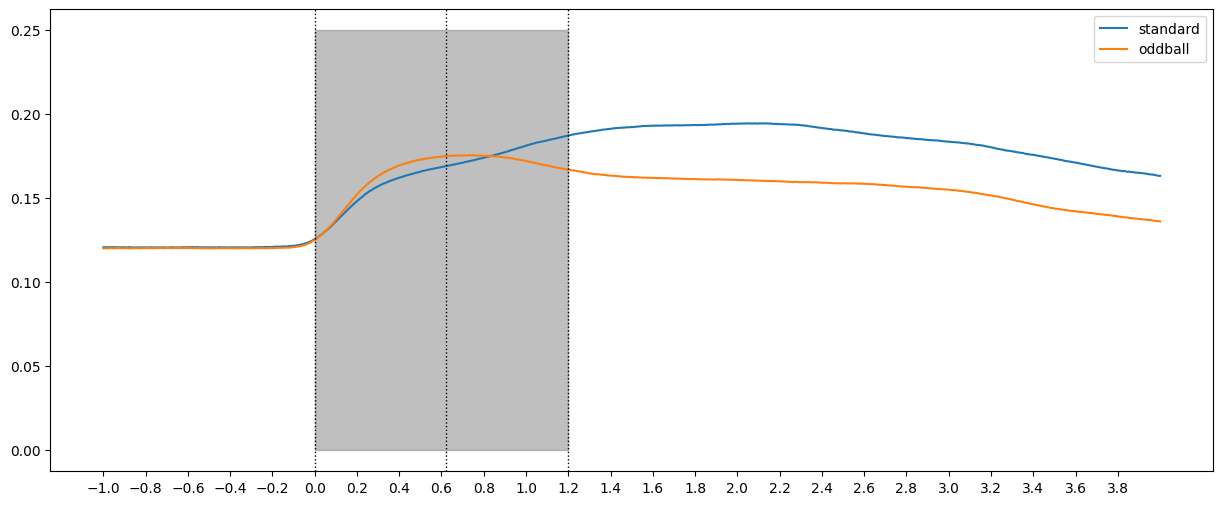

In [224]:
tmax = 4
Dynmo_odd = epochs_aff_odd.copy().crop(-1,tmax).get_data(picks='DynL(lc)')
Dynmo_odd= Dynmo_odd.reshape(Dynmo_odd.shape[0],Dynmo_odd.shape[2]).mean(axis=0)

Dynmo_typ = epochs_aff_typ.copy().crop(-1,tmax).get_data(picks='DynL(lc)')
Dynmo_typ= Dynmo_typ.reshape(Dynmo_typ.shape[0],Dynmo_typ.shape[2]).mean(axis=0)

plt.figure(figsize=(15,6))

time= epochs_aff_typ.copy().crop(-1,tmax).times

plt.plot(epochs_aff_typ.copy().crop(-1,tmax).times,Dynmo_typ)
plt.plot(epochs_aff_odd.copy().crop(-1,tmax).times,Dynmo_odd)

x=np.arange(-1,tmax,0.2)

plt.xticks(x)
idx = np.argwhere(np.diff(np.sign(Dynmo_typ - Dynmo_odd))).flatten()

plt.axvline(0, linewidth=1, color="black", linestyle=":")

plt.axvline(0.62, linewidth=1, color="black", linestyle=":")
plt.axvline(1.2, linewidth=1, color="black", linestyle=":")
plt.fill_betweenx(np.array((0,0.25)), 1.2,0,color='gray', alpha=0.5)

plt.legend(['standard','oddball'])

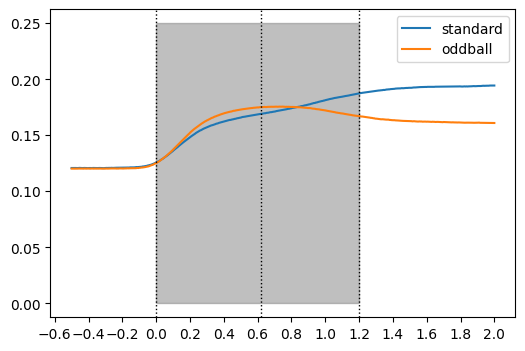

In [225]:
crop_min,crop_max = -0.5,2


tmax = 4
Dynmo_odd = epochs_aff_odd.copy().crop(crop_min,crop_max).get_data(picks='DynL(lc)')
Dynmo_odd= Dynmo_odd.reshape(Dynmo_odd.shape[0],Dynmo_odd.shape[2]).mean(axis=0)

Dynmo_typ = epochs_aff_typ.copy().crop(crop_min,crop_max).get_data(picks='DynL(lc)')
Dynmo_typ= Dynmo_typ.reshape(Dynmo_typ.shape[0],Dynmo_typ.shape[2]).mean(axis=0)

plt.figure(figsize=(6,4))

time= epochs_aff_typ.copy().crop(crop_min,crop_max).times

plt.plot(epochs_aff_typ.copy().crop(crop_min,crop_max).times,Dynmo_typ)
plt.plot(epochs_aff_odd.copy().crop(crop_min,crop_max).times,Dynmo_odd)

x=np.arange(-1,tmax,0.2)

plt.xticks(x)
idx = np.argwhere(np.diff(np.sign(Dynmo_typ - Dynmo_odd))).flatten()

plt.axvline(0, linewidth=1, color="black", linestyle=":")

plt.axvline(0.62, linewidth=1, color="black", linestyle=":")
plt.axvline(1.2, linewidth=1, color="black", linestyle=":")
plt.fill_betweenx(np.array((0,0.25)), 1.2,0,color='gray', alpha=0.5)

plt.legend(['standard','oddball'])

# Event-Related Potentials


C:\Users\malann\AppData\Local\Temp\ipykernel_481664\401259812.py:12: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  evoked_odd.plot(spatial_colors=True, gfp=True, highlight=time_ranges_of_interest, ylim =dict(eeg=[vmin,vmax],dbs=[vmin1,vmax1]))


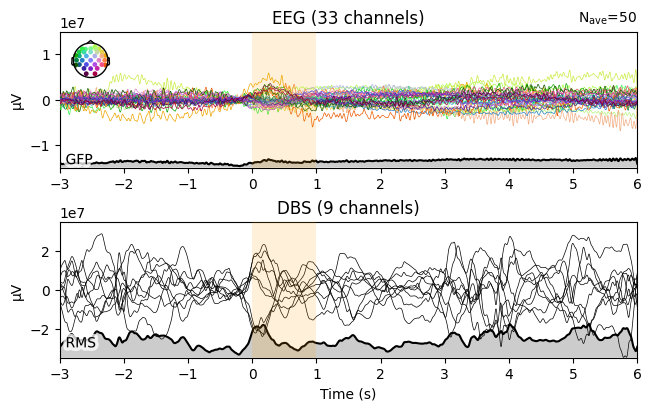

C:\Users\malann\AppData\Local\Temp\ipykernel_481664\401259812.py:13: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  evoked_typ.plot(spatial_colors=True, gfp=True, highlight=time_ranges_of_interest, ylim= dict(eeg=[vmin,vmax],dbs=[vmin1,vmax1]))


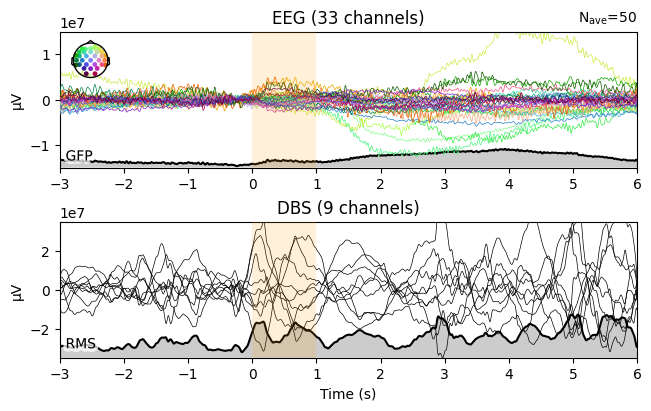

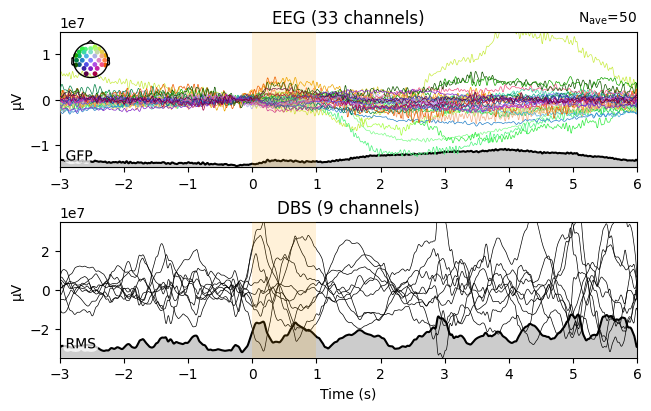

In [209]:
vmin,vmax= -15e6, 15e6
vmin1,vmax1= -35e6, 35e6
time_ranges_of_interest = [(0.0, 1)]

evoked_odd = epochs_aff_odd.average()
evoked_typ = epochs_aff_typ.average()
#evoked_odd = evoked_odd.apply_baseline((-0.5,0))
#evoked_typ = evoked_typ.apply_baseline((-0.5,0))

#evoked_odd.apply_baseline((-2,-1))
#evoked_typ.apply_baseline((-2,-1))
evoked_odd.plot(spatial_colors=True, gfp=True, highlight=time_ranges_of_interest, ylim =dict(eeg=[vmin,vmax],dbs=[vmin1,vmax1]))
evoked_typ.plot(spatial_colors=True, gfp=True, highlight=time_ranges_of_interest, ylim= dict(eeg=[vmin,vmax],dbs=[vmin1,vmax1]))

No projector specified for this dataset. Please consider the method self.add_proj.


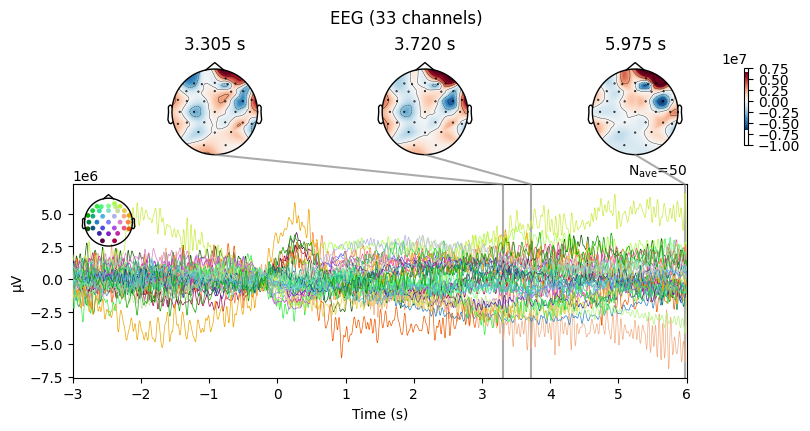

No projector specified for this dataset. Please consider the method self.add_proj.


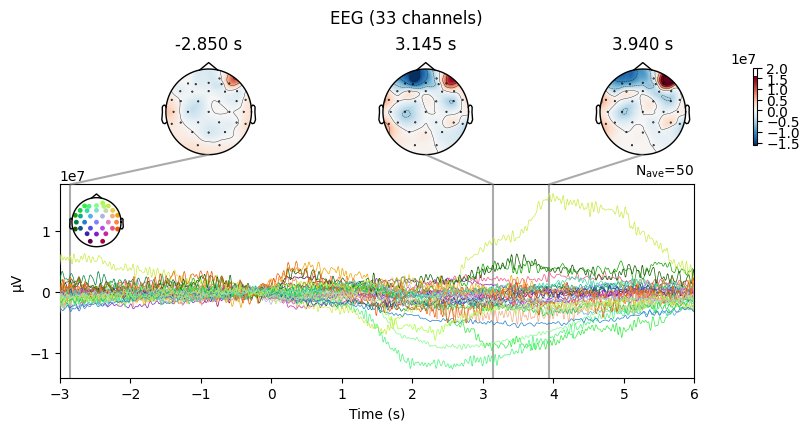

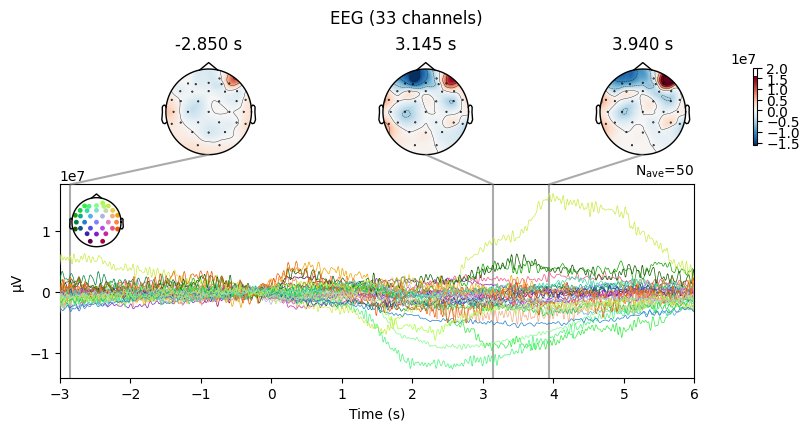

In [210]:
evoked_odd.copy().pick('eeg').plot_joint()
evoked_typ.copy().pick('eeg').plot_joint()


No projector specified for this dataset. Please consider the method self.add_proj.


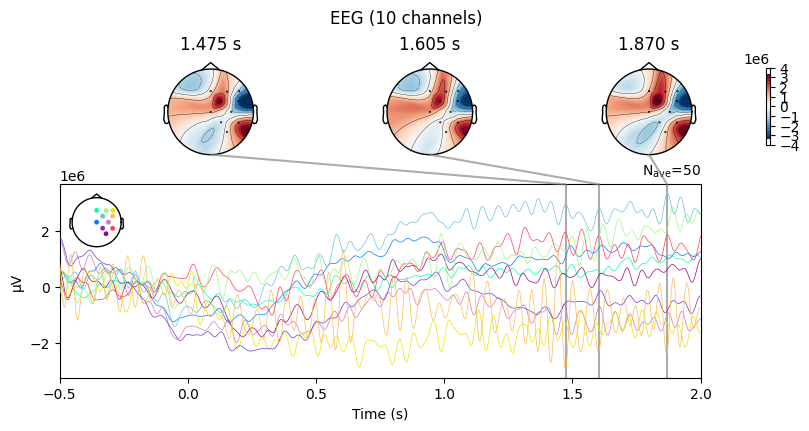

No projector specified for this dataset. Please consider the method self.add_proj.


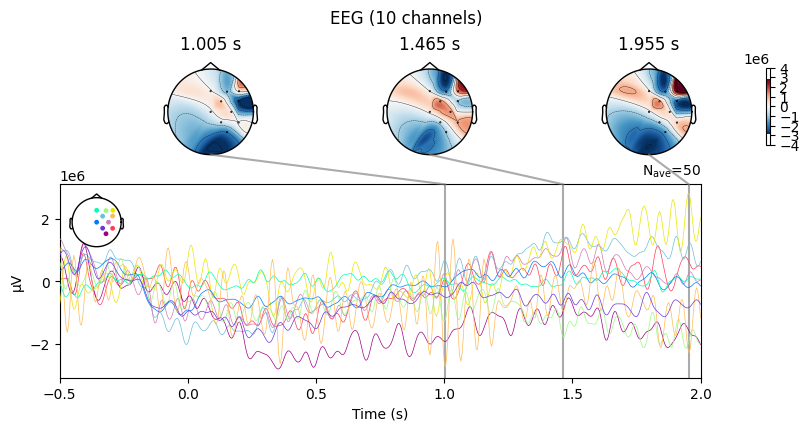

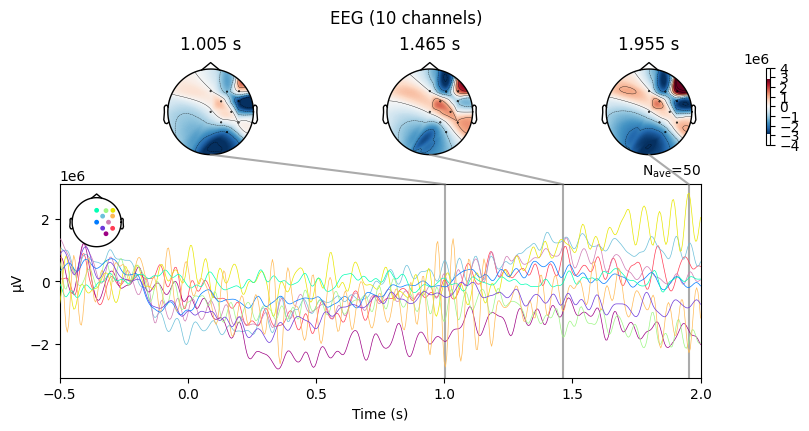

In [211]:
if subj_list == ['013'] or subj_list == ['014'] or subj_list == ['015']:
    ch_picks =['F4','F8','Fz','FC2','FC6','Cz','C4','CP2','CP6','P4']
else:
    ch_picks =['F8','F4','FC6','FC2','Fz','Cz','C4','CP6','CP2','P4']
    
evoked_odd.copy().crop(crop_min,crop_max).pick(ch_picks).plot_joint()
evoked_typ.copy().crop(crop_min,crop_max).pick(ch_picks).plot_joint()


No projector specified for this dataset. Please consider the method self.add_proj.


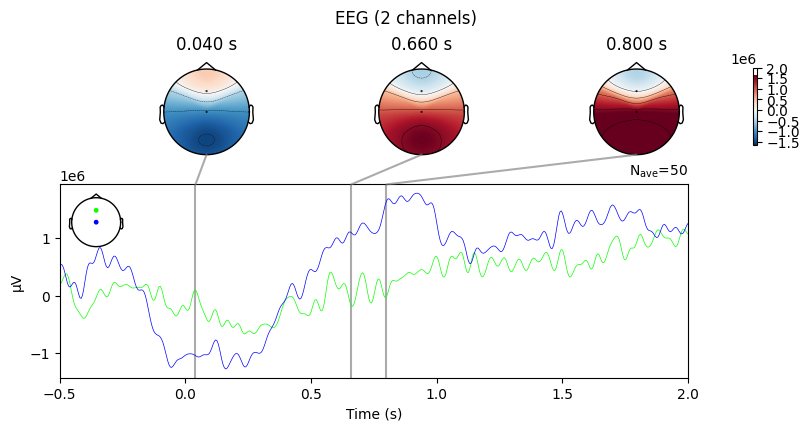

No projector specified for this dataset. Please consider the method self.add_proj.


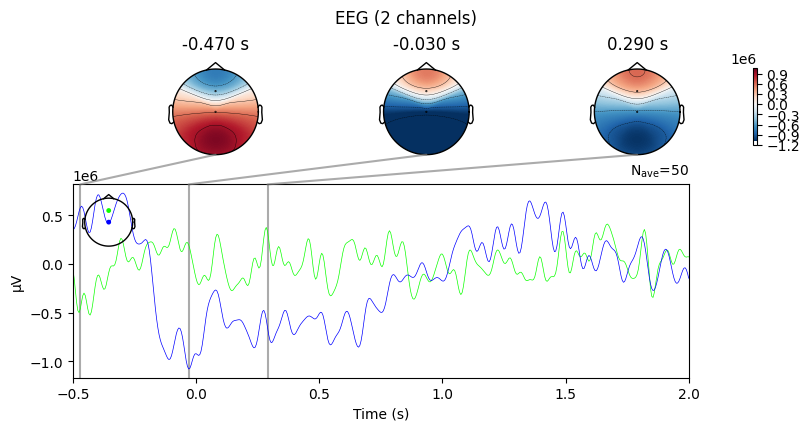

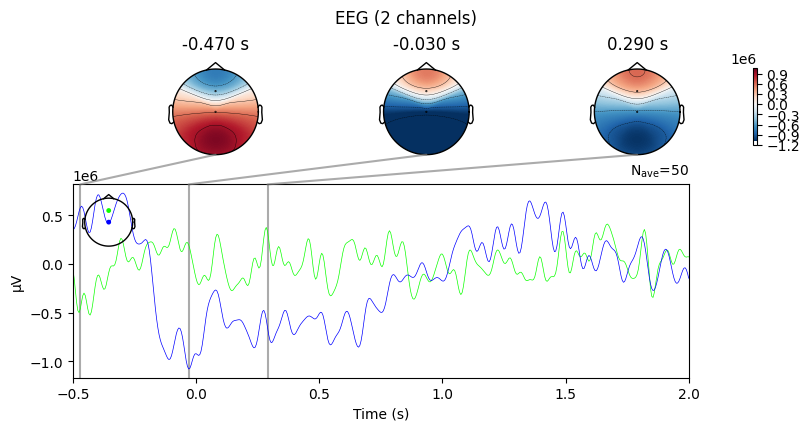

In [212]:
evoked_odd.copy().crop(crop_min,crop_max).pick(['Fz','Cz']).plot_joint()
evoked_typ.copy().crop(crop_min,crop_max).pick(['Fz','Cz']).plot_joint()

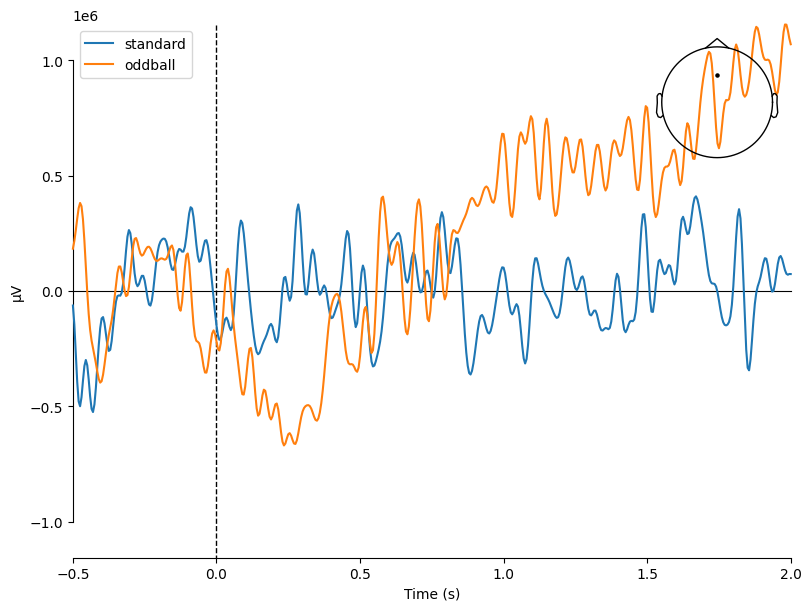

[<Figure size 800x600 with 2 Axes>]

In [213]:
mne.viz.plot_compare_evokeds(
    dict(standard=evoked_typ.copy().crop(crop_min,crop_max).pick(['Fz']),oddball=evoked_odd.copy().crop(crop_min,crop_max).pick(['Fz'])),
    legend="upper left",
    show_sensors="upper right",
)

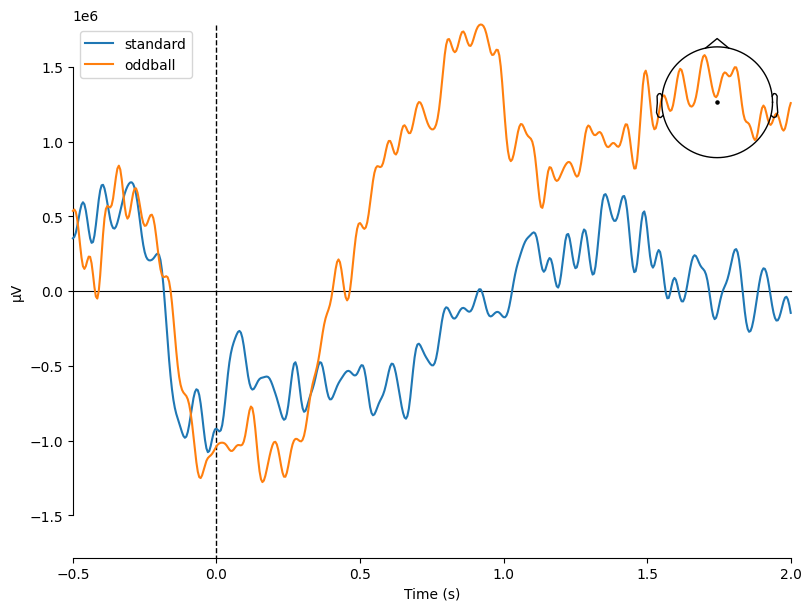

[<Figure size 800x600 with 2 Axes>]

In [214]:
mne.viz.plot_compare_evokeds(
    dict(standard=evoked_typ.copy().crop(crop_min,crop_max).pick(['Cz']),oddball=evoked_odd.copy().crop(crop_min,crop_max).pick(['Cz'])),
    legend="upper left",
    show_sensors="upper right",
)

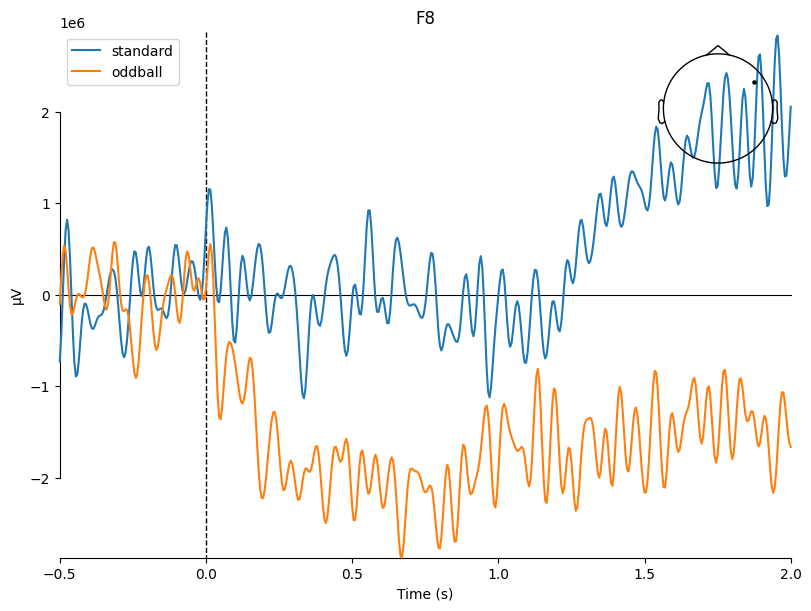

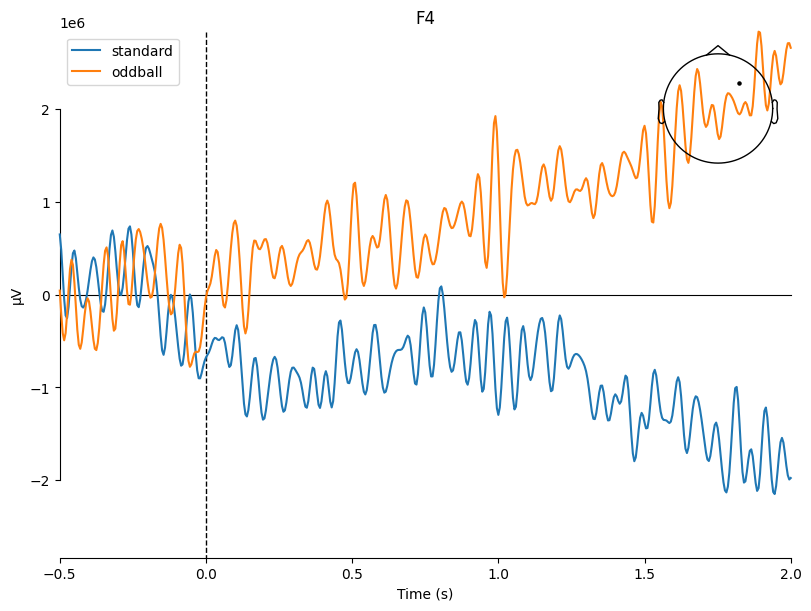

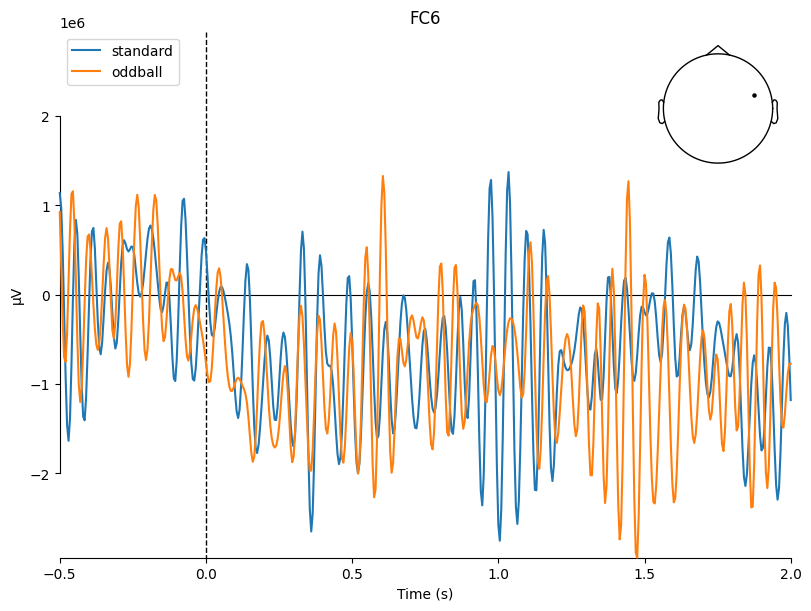

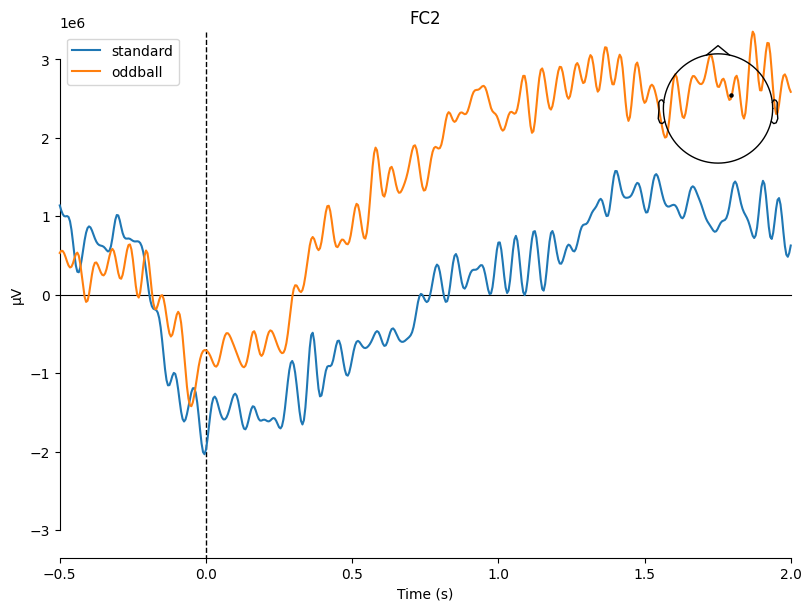

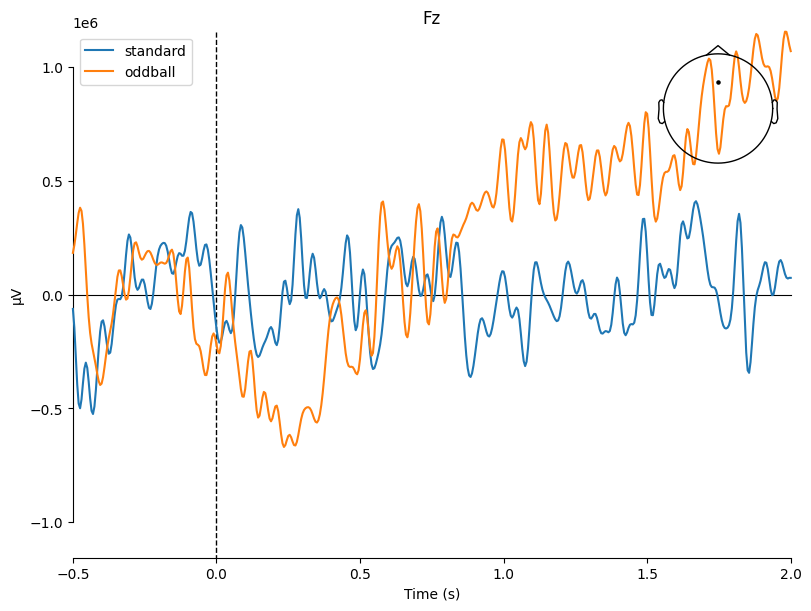

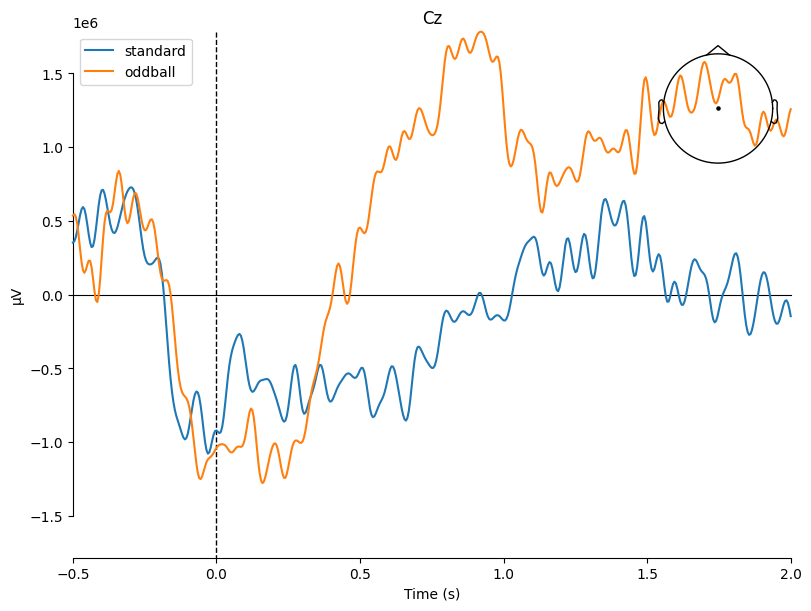

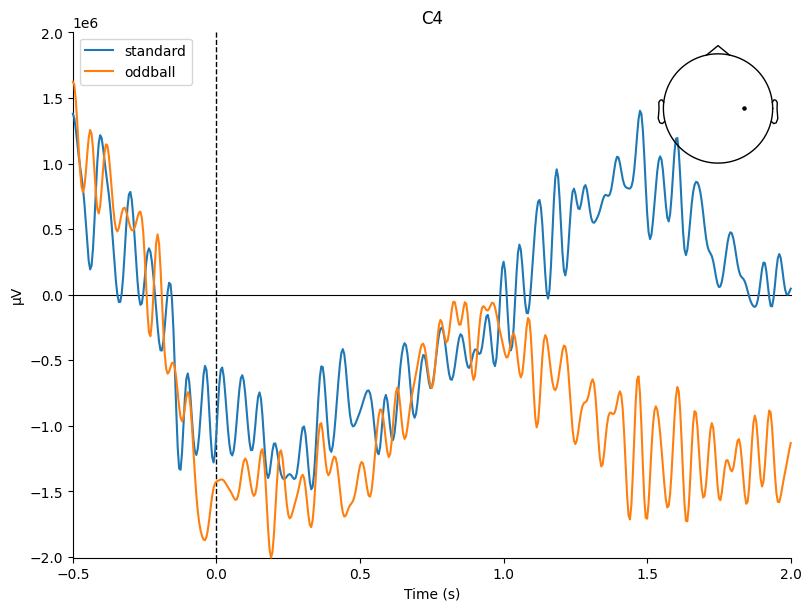

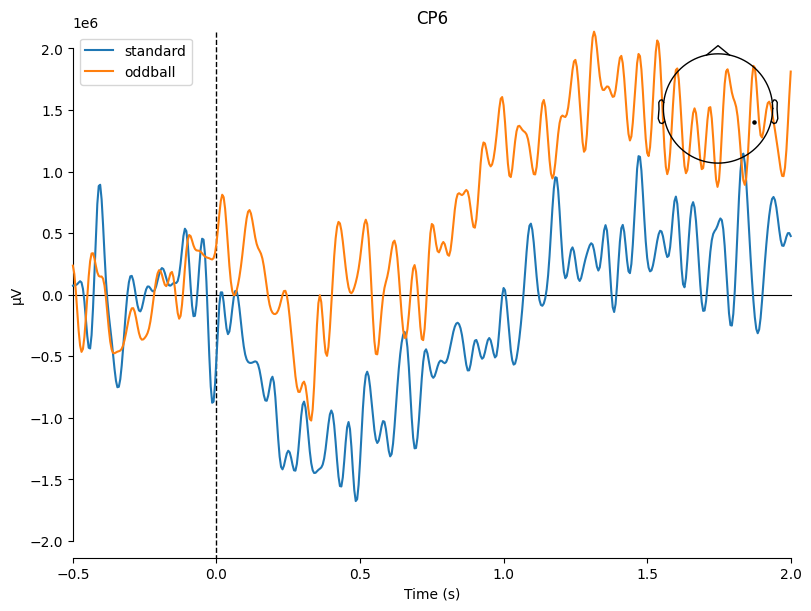

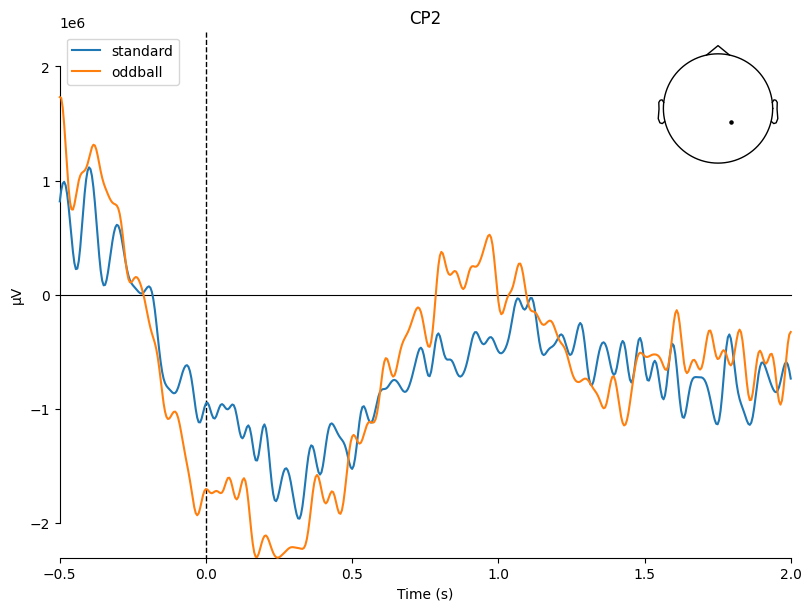

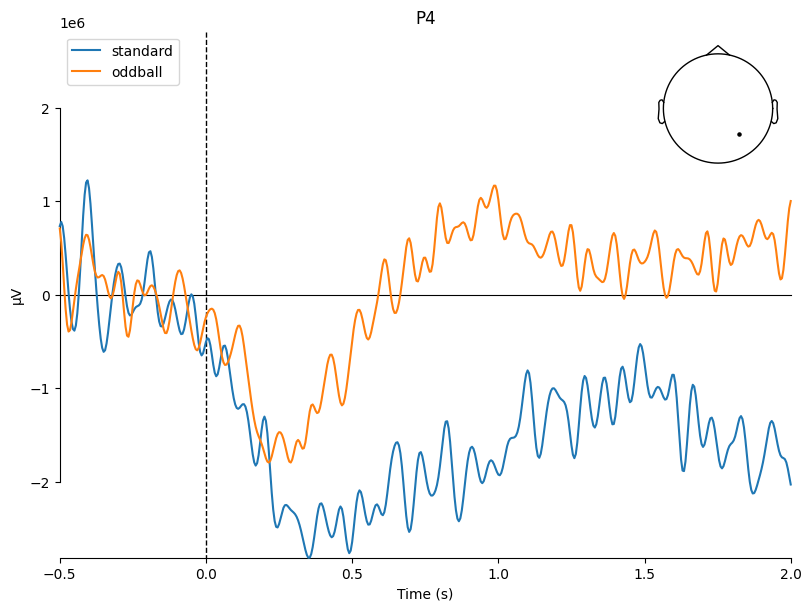

In [215]:
if subj_list == ['013'] or subj_list == ['014'] or subj_list == ['015']:
    ch_picks =['F4','F8','Fz','FC2','FC6','Cz','C4','CP2','CP6','P4']
else:
    ch_picks =['F8','F4','FC6','FC2','Fz','Cz','C4','CP6','CP2','P4']
    
    
for ch in ch_picks:
    title = ch
    mne.viz.plot_compare_evokeds(
        dict(standard=evoked_typ.copy().crop(crop_min,crop_max).pick([ch]),oddball=evoked_odd.copy().crop(crop_min,crop_max).pick([ch])),
        legend="upper left",
        show_sensors="upper right",title=title
    )

C:\Users\malann\AppData\Local\Temp\ipykernel_481664\166579261.py:6: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(


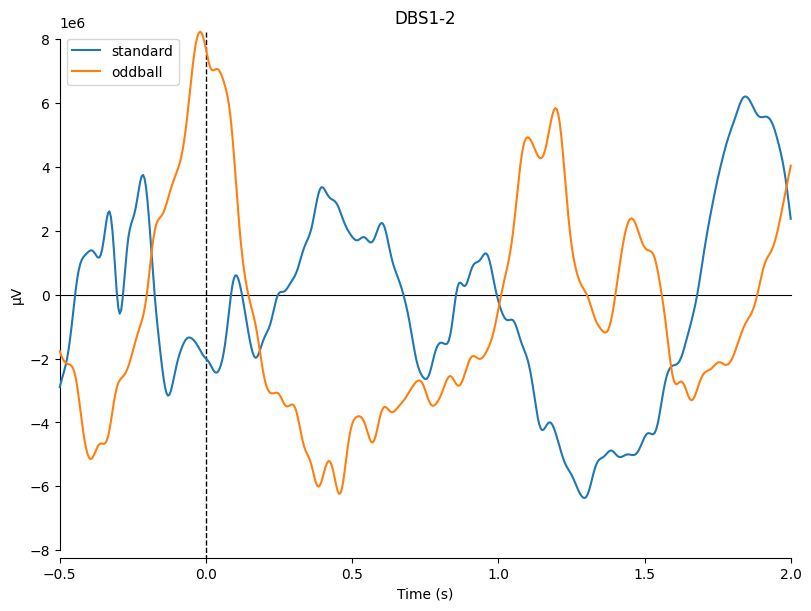

C:\Users\malann\AppData\Local\Temp\ipykernel_481664\166579261.py:6: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(


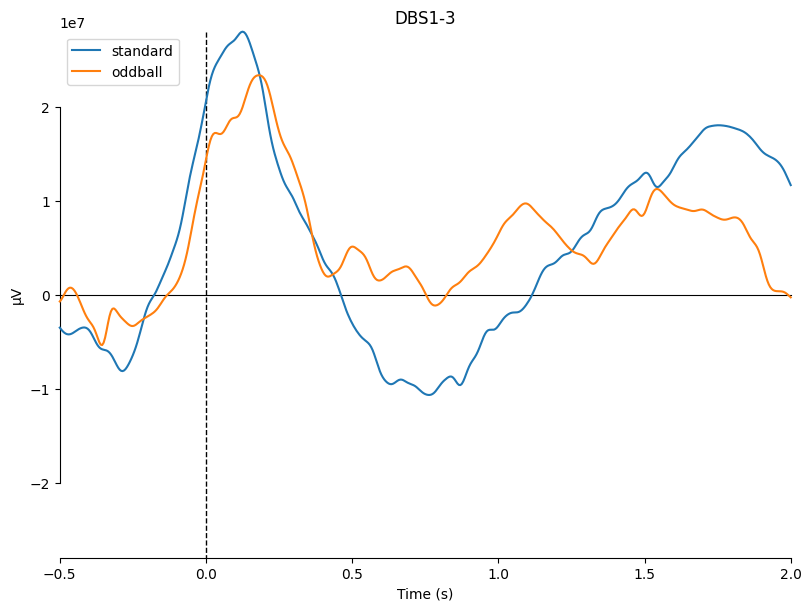

C:\Users\malann\AppData\Local\Temp\ipykernel_481664\166579261.py:6: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(


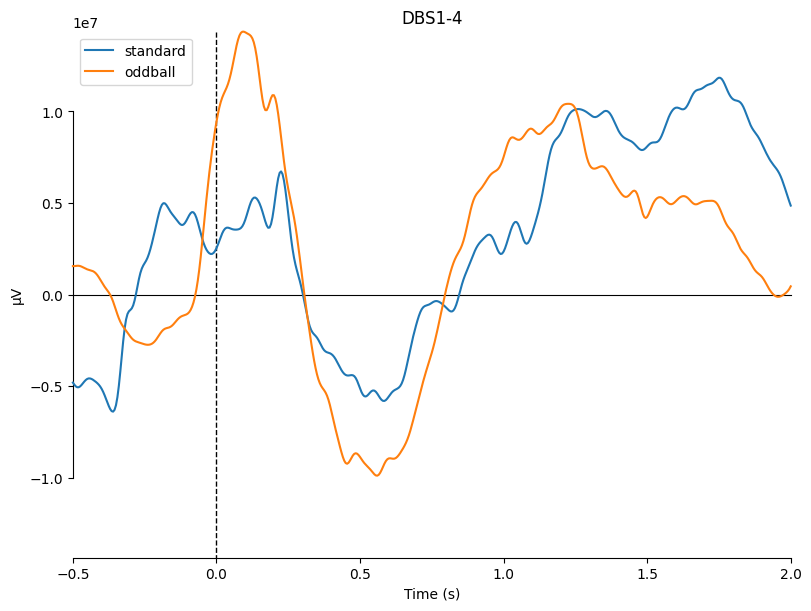

C:\Users\malann\AppData\Local\Temp\ipykernel_481664\166579261.py:6: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(


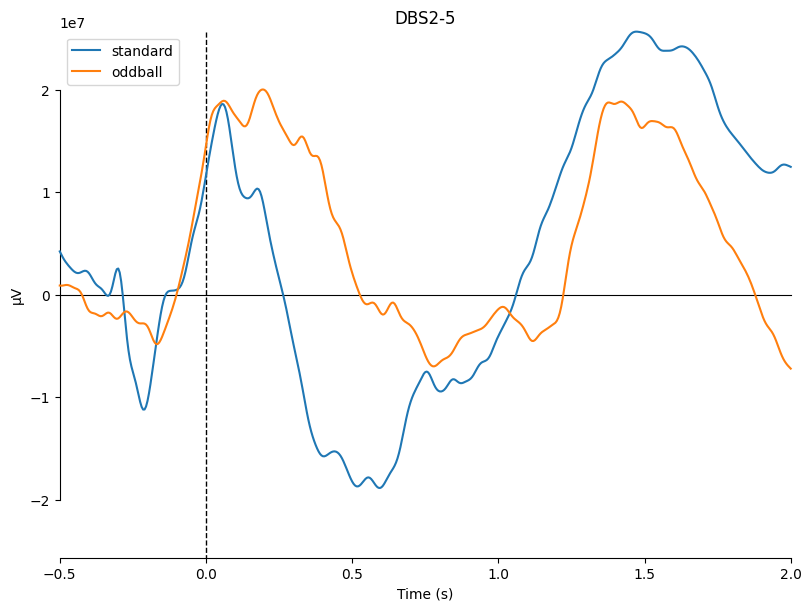

C:\Users\malann\AppData\Local\Temp\ipykernel_481664\166579261.py:6: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(


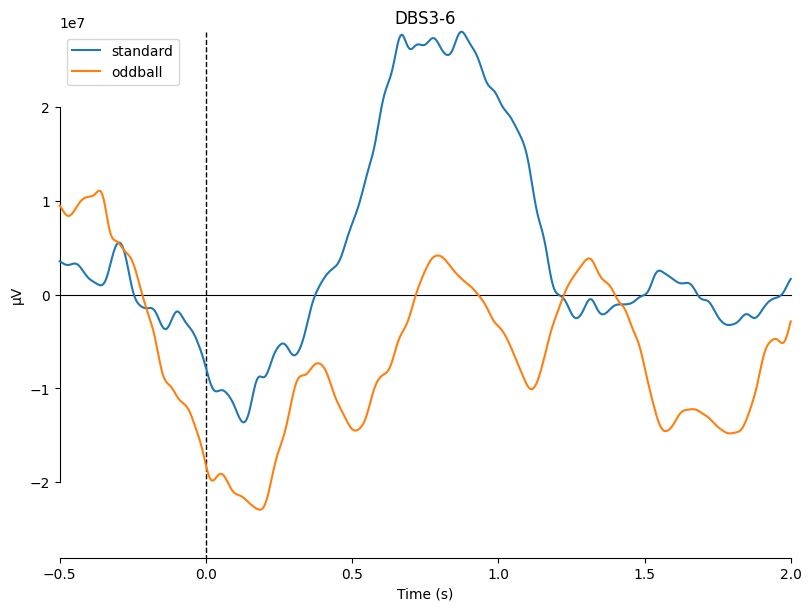

C:\Users\malann\AppData\Local\Temp\ipykernel_481664\166579261.py:6: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(


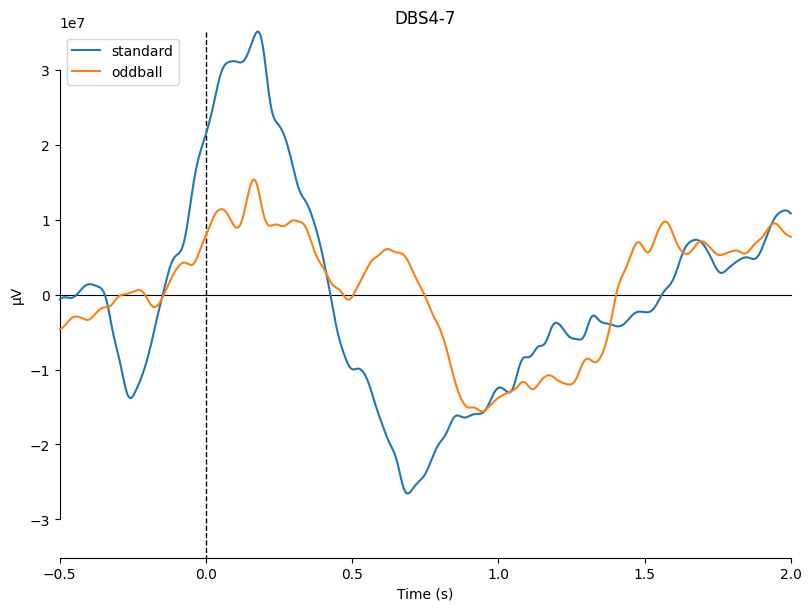

C:\Users\malann\AppData\Local\Temp\ipykernel_481664\166579261.py:6: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(


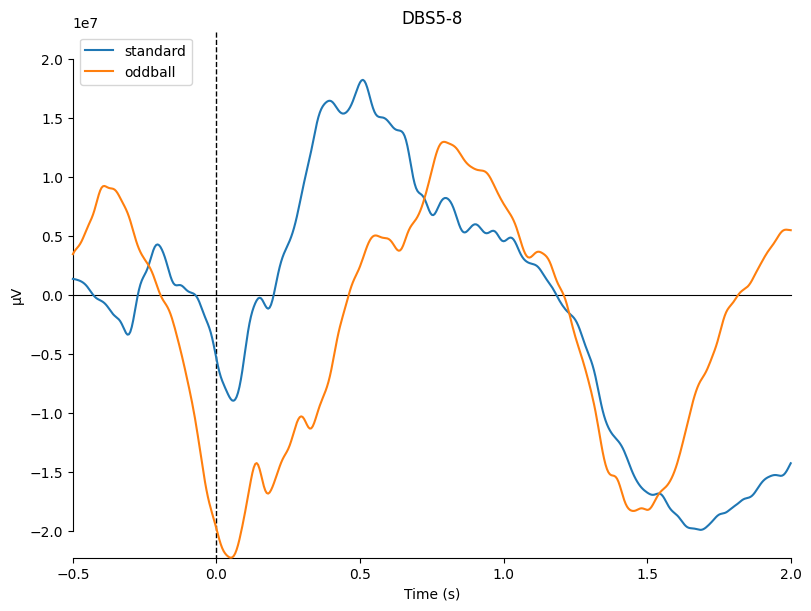

C:\Users\malann\AppData\Local\Temp\ipykernel_481664\166579261.py:6: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(


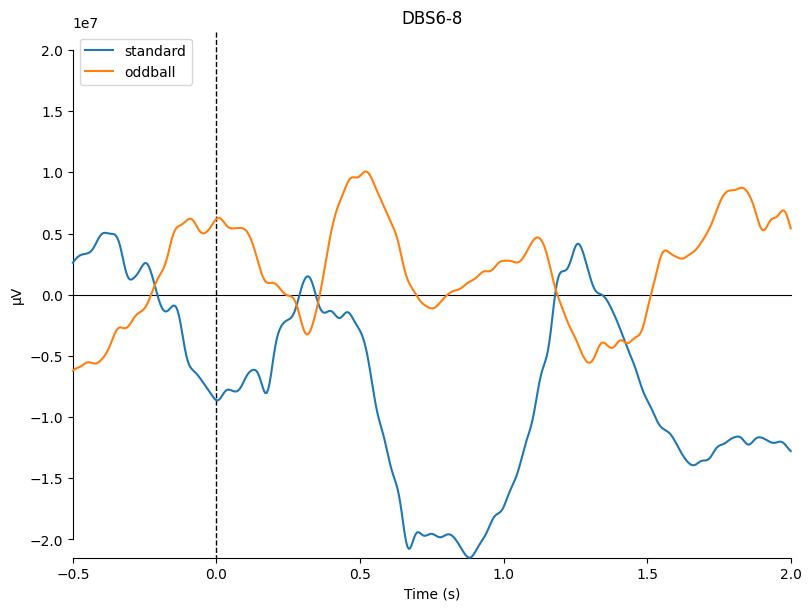

C:\Users\malann\AppData\Local\Temp\ipykernel_481664\166579261.py:6: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(


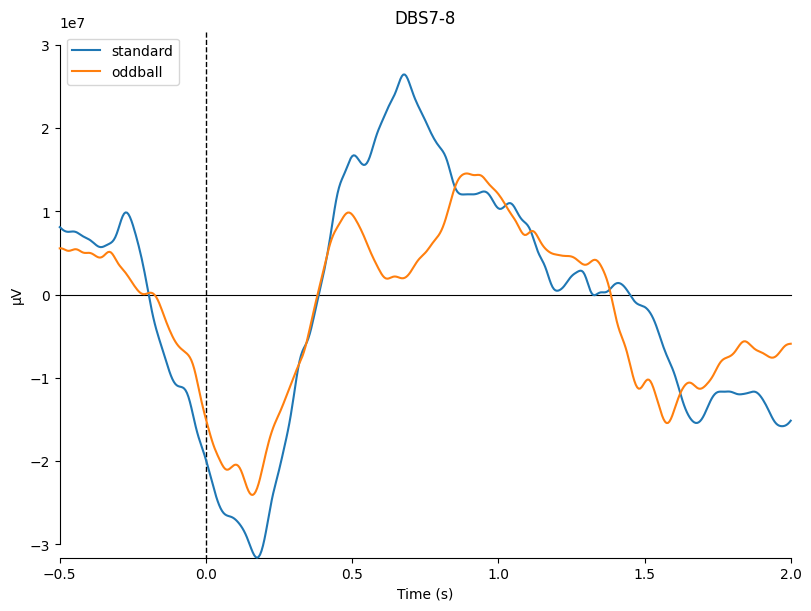

In [216]:
ch_picks = evoked_typ.copy().pick('dbs').ch_names
    
    
for ch in ch_picks:
    title = ch
    mne.viz.plot_compare_evokeds(
        dict(standard=evoked_typ.copy().crop(crop_min,crop_max).pick([ch]),oddball=evoked_odd.copy().crop(crop_min,crop_max).pick([ch])),
        legend="upper left",
        show_sensors="upper right",title=title
    )

In [220]:
ecg_epochs = mne.preprocessing.create_ecg_epochs(epochs_aff_odd)
ecg_epochs.plot_image(combine="mean")

ValueError: Unable to generate artificial ECG channel

In [219]:
epochs_aff_odd.plot_topomap(times=np.linspace(-0.05, 0.05, 11))

AttributeError: 'EpochsArray' object has no attribute 'plot_topomap'